In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Data_set/customer_shopping_data (TDI).csv')

data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,Invoice_Date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,8/5/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11/9/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,5/16/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,10/24/2021,Kanyon


In [3]:
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'Invoice_Date', 'shopping_mall'],
      dtype='object')

### 1. Basic Information:
#####   - What is the total number of invoices in the dataset?
#####   - How many unique customers are there?
#####   - What is the average age of customers?



In [4]:
# Total number of invoices in the dataset
total_num_of_invoice = len(data['invoice_no'])

total_num_of_invoice

99457

In [5]:
# Number of unique customers
num_of_unique_customers = len(data['customer_id'].unique())

num_of_unique_customers

99457

In [6]:
# Average age of customers

ages = data['age']

average_age = np.average(ages)

average_age

43.42708909377922

In [7]:
rounded_up = np.round(average_age, 2)

rounded_up

43.43

### 2. Category Analysis:
####   - What are the unique categories of items in the dataset?
####   - Which category has the highest quantity sold?
####   - Can you find the average price for each category?


In [8]:
# The unique categories of items in the dataset
unique_category = pd.DataFrame(data.category.unique())

unique_category

,0
0,Clothing
1,Shoes
2,Books
3,Cosmetics
4,Food & Beverage
5,Toys
6,Technology
7,Souvenir


In [9]:
# category with the highest quantity sold

highest_quantity = np.max(data.quantity)
highest_category = data[data.quantity == highest_quantity].category.values[0]
print(f"The category with the highest quantity sold is: {highest_category} with a quantity of {highest_quantity}")

The category with the highest quantity sold is: Clothing with a quantity of 5


In [10]:
# The average price of each category

total_price = pd.DataFrame(data.groupby('category')['price'].sum())
total_price

,price
category,
Books,226977.30
Clothing,31075684.64
Cosmetics,1848606.90
Food & Beverage,231568.71
Shoes,18135336.89
Souvenir,174436.83
Technology,15772050.00
Toys,1086704.64


In [11]:
average_price = pd.DataFrame(data.groupby('category')['price'].mean())
average_price

,price
category,
Books,45.568621
Clothing,901.084021
Cosmetics,122.448626
Food & Beverage,15.671948
Shoes,1807.388568
Souvenir,34.894345
Technology,3156.935548
Toys,107.733185


### Payment Method Distribution:
#####   - What are the different payment methods used?
#####   - Create a pie chart to represent the distribution of payment methods.


In [12]:
payment_methods = pd.DataFrame(data.payment_method.unique())

payment_methods

,0
0,Credit Card
1,Debit Card
2,Cash


ValueError: could not convert string to float: 'Credit Card'

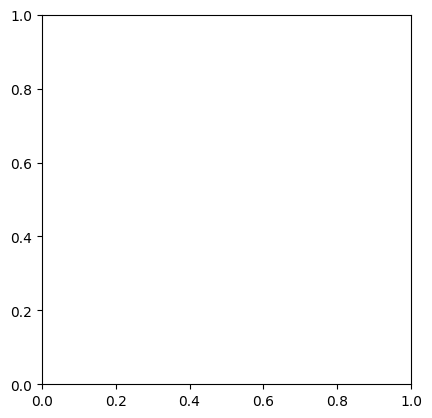

In [13]:
# Create a pie chart to represent the distribution of payment methods.
%matplotlib inline
import matplotlib.pyplot as plt

plt.pie(data.payment_method.unique())

### 4. Shopping Mall Insights:
#####   - Which shopping mall had the most transactions?
#####   - What is the average quantity of items purchased in each shopping mall?


In [14]:
# Which shopping mall had the most transactions?

most_trnsactions = np.max(data.shopping_mall)


In [15]:
most_trnsactions

'Zorlu Center'

In [16]:
# What is the average quantity of items purchased in each shopping mall?

average_quantity = np.average(data.quantity)

In [17]:
average_quantity

3.003428617392441

### 5. Temporal Analysis:
#####   - How many invoices are there for each month?
#####   - Create a line chart to visualize the trend in sales over time.


In [19]:
# 5. How many invoices are there for each month?

import calendar
import datetime
from datetime import datetime
from dateutil import parser

In [25]:
data['Invoice_Date'] = pd.to_datetime(data['Invoice_Date'])

data['Month'] = data['Invoice_Date'].dt.month

invoices_per_month = data.groupby('Month').size()

invoices_per_month_df = pd.DataFrame({'Month': invoices_per_month.index, 'Invoices': invoices_per_month.values})

invoices_per_month_df

,Month,Invoices
0,1,11608
1,2,10482
2,3,8730
3,4,7487
4,5,7697
5,6,7581
6,7,7877
7,8,7635
8,9,7353
9,10,7764


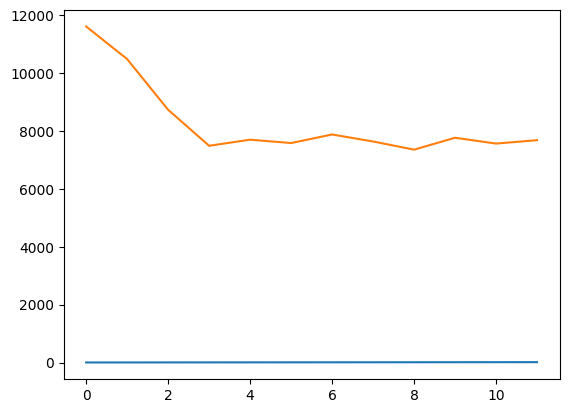

In [27]:
# Create a line chart to visualize the trend in sales over time.

plt.plot(invoices_per_month_df);

In [29]:
data.sample(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,Invoice_Date,shopping_mall,Month
46593,I714478,C278988,Female,34,Souvenir,1,11.73,Cash,2022-04-18,Emaar Square Mall,4
92577,I125015,C160295,Male,22,Toys,3,107.52,Cash,2021-04-30,Kanyon,4
89747,I239582,C184487,Female,54,Shoes,2,1200.34,Credit Card,2022-11-07,Istinye Park,11
66430,I276620,C588137,Female,69,Clothing,5,1500.40,Cash,2021-08-31,Kanyon,8
10659,I250875,C150302,Male,46,Technology,4,4200.00,Credit Card,2022-12-27,Cevahir AVM,12


### 6. Customer Gender Distribution:
#####   - How many male and female customers are in the dataset?
#####   - Create a bar chart to represent the gender distribution.


In [34]:
# 6. How many male and female customers are in the dataset?
  
male = data[data.gender == 'Male']
female = data[data.gender == 'Female']

print("Number of Male Customers: ", len(male))
print("Number of Female Customers: ", len(female))

Number of Male Customers:  39975
Number of Female Customers:  59482


TypeError: unhashable type: 'numpy.ndarray'

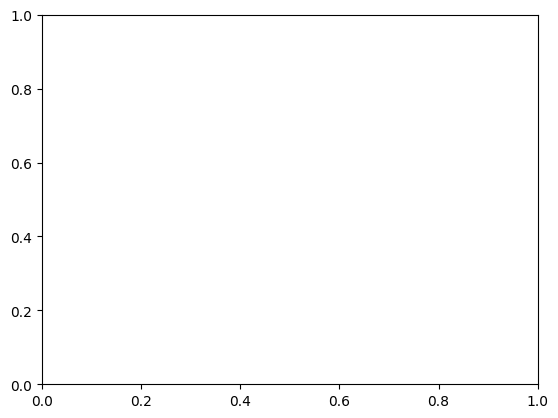

In [41]:
# Create a bar chart to represent the gender distribution.
x = len(male)
y = len(female)
plt.bar(x, male, label='Male')
plt.bar(y, female, bottom=male, label='Female')

### 7. Price Analysis:
#####   - What is the total revenue generated from all invoices?
#####   - Create a histogram to show the distribution of item prices.


In [43]:
# - What is the total revenue generated from all invoices?

total_revenue = round(np.sum(data.price), 2)

total_revenue

68551365.91

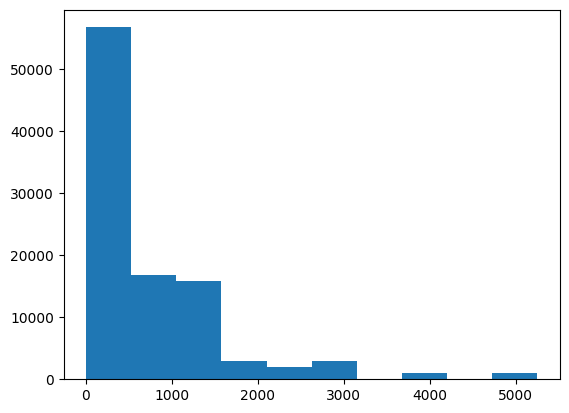

In [45]:
# Create a histogram to show the distribution of item prices.

plt.hist(data.price);

### 8. Age Group Analysis:
#####   - Group customers into age brackets (e.g., 20-30, 31-40) and count how many customers are in each group.
#####   - Create a bar chart to represent the distribution of customers across age groups.


In [56]:
# Group customers into age brackets (e.g., 20-30, 31-40) and count how many customers are in each group.

age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]

age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+']

age_group = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = age_group.value_counts().sort_index()

age_group_df = pd.DataFrame({'Age Bracket': age_group_counts.index, 'Counts': age_group_counts.values})

age_group_df

ValueError: Bin labels must be one fewer than the number of bin edges

In [50]:
# Assuming data is your DataFrame
unique_ages = data['age'].unique()
print(unique_ages)


[28 21 20 66 53 49 32 69 60 36 29 67 25 24 65 42 46 23 27 52 44 51 50 68
 43 59 54 48 40 41 19 18 22 61 45 64 33 63 34 47 38 57 30 26 62 39 55 56
 35 31 37 58]


TypeError: 'module' object is not callable